Sumbitted on 27 Oct 2023
Paper name: Data Mining and Knowledge Engineering

---

<br>

# Project Objective:

To compare the performance of three classification algorithms Multinomial Naive Bayes, Multilayer Perceptron, and Support Vector Machine.

<br>

# Tools used
Python (NLP libraries like NLTK, and Machine Learning libraries like scikit-learn).


<br>

# Algorithms and parameters used:
   - Multinomial Naive Bayes (MNB), Param: default
   - Multilayer Perceptron (MLP), Param: 100,100, a=0.01
   - Support Vector Machine (SVM), Param: default
  
<br>

# Results (accuracy):

MNB: 0.533

MLP: 0.53

SVM: 0.59

<br>

# Best-performing algorithm and why:

Support Vector Machine.

Reason:
SVM demonstrated the highest Accuracy, Precision and Recall rates. It also exhibited robustness to noise and changes in input data, making it the ideal choice for the this particular dataset. Additionaly, it does not require significant computational resources, making it an approachable option.

<br>

# Details about the dataset:
- This public domain dataset is collected from data.world platform, shared by @crowdflower, a data enrichment, mining and crowdsourcing company based in the US.
- The dataset consists of 40000 records of tweets labelled with 13 different sentiments, followed by Tweet ID number.
- All data types are strings, except for the 'tweet ID' column, which is an integer.
- There is a class imbalance of <21.32%. Tweets primarily convey neutral and negative sentiments.
- Contains 172 duplicate rows (tweets) but categorised with different sentiment labels.
- Word lengths vary, ranging from a minimum of 1 word to a maximum of 16 words.
- The data exhibits some degree of disorder and lack of cohesion. Various linguistic patterns used to express sentiment.
- Some information contains only special characters or hyperlinks.
- Contains informal and colloquial terms. For instance, “peeps” is a friendly term for “People”.
- Contains self-made terms, slangs or misspellings such as “Humpalow”.

<br>

# Four things I did to maximise accuracy and why:

- One: Cleaned special characters

Rationale: Tweets contain dynamic ways of conveying emotions through text. I retained punctuation marks ('!' and '?') to capture emotional tones during text cleaning. However, as there was no significant difference in the results - I proceeded to remove these characters.


- Two: Lemmatisation

Rationale: Experimented stemming and lemmatisation, using both and interchangeably. Neither had zero to minimal impact on accuracy. Stemming showed no effect, while lemmatisation produced slight changes of 0.001.

- Three: Retained stopword

Rationale:  Retaining stopwords improved precision.
There's a possibility that removing stopwords could result in the loss of valuable information, especially in rows where a high number of stopwords, accounting for over 50% of the sentence.

- Four: TF-IDF as Feature Engineering method

Rationale:  TF-IDF exhibited higher accuracy compared to GloVe. Accuracy rates dropped by up to 20% after embedding text using GloVe.

<br>

# What did I do to mitigate data imbalance?:

I Combined the 13 labels into three primary emotions: Positive, Negative, and Neutral. Further details are explained in [Data Exploration: Balancing Class](#balancing-class).

<br>

# Table of Contents:

#### 1. Data Exploration
- [Data Exploration: Data Preparation](#data-exploration)
- [Data Exploration: Exploring Class](#exploring-class)

#### 2. Preprocess
- [Preprocessing: Data Cleaning](#data-cleaning)
- [Exploring Cleaned Data & Investigating Stopwords in Text](#preprocessing)
- [Tokenising](#tokenisation)

#### 3. Feature Engineering
- [Vectorising using TF-IDF](#tfidf)

#### 4. Model Training/Testing/Evaluation
- [MNB](#mnb)
- [MLP](#mlp)
- [SVM](#svm)

#### 5. [Experiment details](#details)

#### 6. [Conclusion](#conclusion)  

In [ ]:
!pip show nltk
!pip install --upgrade nltk

Name: nltk
Version: 3.2.4
Summary: Natural Language Toolkit
Home-page: http://nltk.org/
Author: Steven Bird
Author-email: stevenbird1@gmail.com
License: Apache License, Version 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: six
Required-by: preprocessing, textblob
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np

import re
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import load_files
!pip install stop_words
nltk.download('stopwords')
import pickle

from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
#!pip install stop_words

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Exploration: Data Preparation
<a id='data-exploration'></a>

In [ ]:
df = pd.read_csv('/kaggle/input/emotion-detection-from-text/tweet_emotions.csv')
df.head(10)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
7,1956968636,worry,Hmmm. http://www.djhero.com/ is down
8,1956969035,sadness,@charviray Charlene my love. I miss you
9,1956969172,sadness,@kelcouch I'm sorry at least it's Friday?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
# Find any numerical variables.
numerical = [var for var in df.columns if df[var].dtype!='O']

print('Num of numerical variables: {}\n'.format(len(numerical)))
print('The numerical variables are: ', numerical)

Num of numerical variables: 1

The numerical variables are:  ['tweet_id']


In [ ]:
# Drop the unecessary column (numerical variables)
df = df.drop(columns=['tweet_id'])

In [ ]:
# Count duplicates
duplicates_count = df.duplicated().sum()
print(f'Total duplicated rows: {duplicates_count}')

Total duplicated rows: 91


In [ ]:
# Check for duplicates
df[df['content'].duplicated() == True]

,sentiment,content
366,worry,I feel so deflated. No more doggy.
521,worry,Somebody please save the polar bears!
1026,neutral,I'm at work
3684,sadness,@dublins98dave me too! I am down 400 euro
4363,worry,"is upset, I left my phone at home again"
...,...,...
39859,love,Happy Mothers Day
39898,love,happy mothers day!
39913,happiness,happy mother's day!
39915,love,happy mother's day everyone


In [ ]:
# Drop duplicated values
index = df[df['content'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [ ]:
# Final shape of data after dropping duplicates
df.shape

(39827, 2)

# Data Exploration: Exploring Class 
<a id='exploring-class'></a>

In [ ]:
# Unique values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [ ]:
# Frequency distribution of'sentiment'
frequency_counts = df['sentiment'].value_counts()

frequency_percentage = (frequency_counts / len(df['sentiment'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Print total value
cardinality = df['sentiment'].nunique()
print(f"\ntotal values: {cardinality}")

            Counts  Percentage
sentiment                     
neutral       8598   21.588370
worry         8437   21.184121
happiness     5184   13.016295
sadness       5154   12.940970
love          3785    9.503603
surprise      2181    5.476184
fun           1775    4.456776
relief        1522    3.821528
hate          1322    3.319356
empty          822    2.063926
enthusiasm     758    1.903231
boredom        179    0.449444
anger          110    0.276195

total values: 13


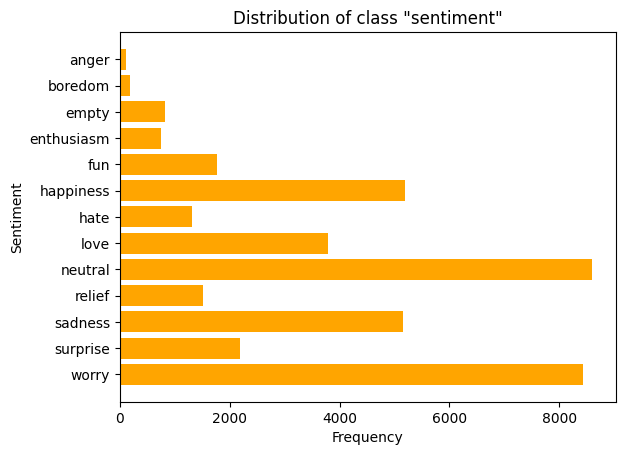

In [ ]:
# Extract sentiment values & frequencies
sentiment_counts = df['sentiment'].value_counts().sort_index()

sentiments = sentiment_counts.index
frequencies = sentiment_counts.values

# Plot
plt.barh(sentiments, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')
plt.title('Distribution of class "sentiment"')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest sentiment at the top
plt.show()

Observations:
- Classes are imbalanced - each class is not evenly distributed. Imbalance rate <21.32% (anger - neutral)
- Tweets primarily convey neutral and negative sentiments

# Data Exploration: Balancing Class
<a id='balancing-class'></a>

<br>

The above result illustrates class imbalance of <21.32%.
To find the best ratio, I've experimented with aggregating classes in **five different methods**:


**Method 1:** Categorising the data into two primary emotions: Positive, Negative ('Surprise' and 'Neutral' as Negative).


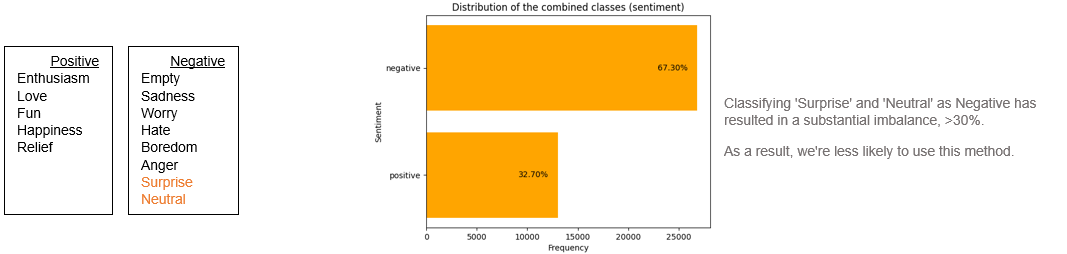


**Method 2:** Categorising the data into two primary emotions: Positive, Negative ('Surprise' and 'Neutral' as Positive).

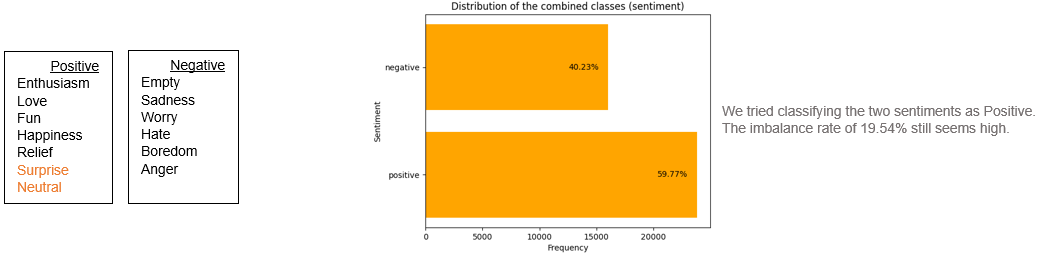


**Method 3:** Categorising the data into two primary emotions: Positive, Negative ('Neutral' as Positive, 'Surprise' as Negative).

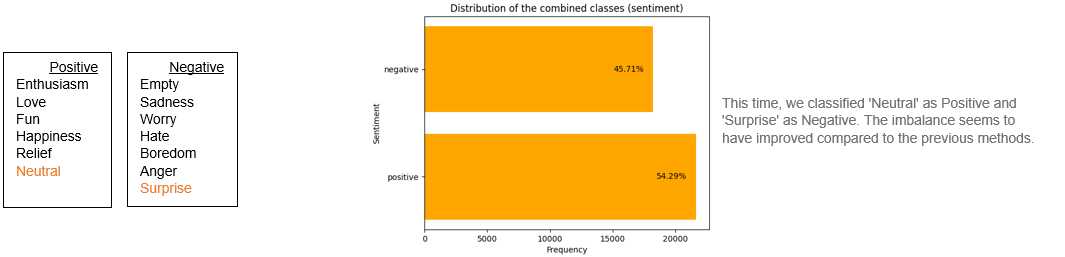

**Method 4:** Categorising the data into two primary emotions: Positive, Negative ('Surprise' as Positive, 'Neutral' as Negative).

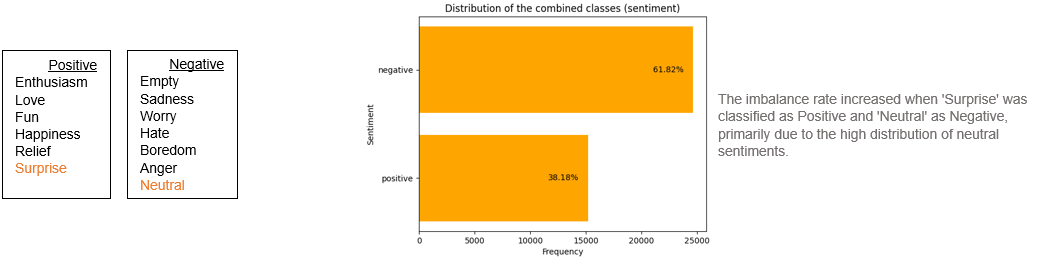

**Method 5:** Categorising the data into three primary emotions: Positive, Negative, and Neutral

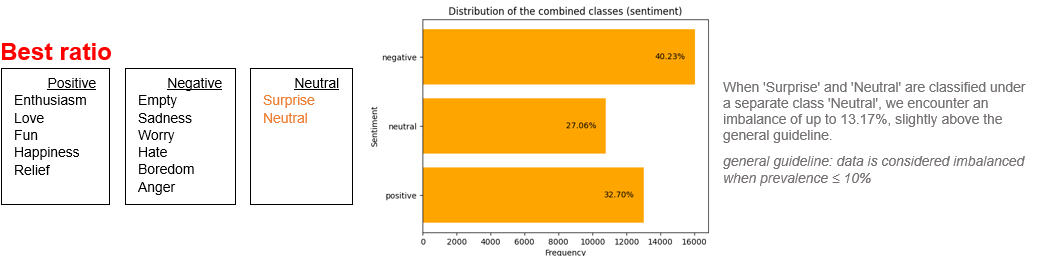


When 'Surprise' and 'Neutral' are classified under a separate class 'Neutral', I encounterd an imbalance of up to 13.17%, slightly above the general guideline.

(General guideline: data is considered imbalanced when prevalence ≤ 10%)


Among the 5 results, method 3 yielded the lowest imbalance at 8.58%. However, I would not choose this method primarily because 'neutral' and 'surprise' rely significantly on the context of the text for differentiation, unlike the others, which are clearly either positive or negative.

'Neutral' typically represents a lack of strong emotion or a state of indifference. It's neither strongly positive nor negative.

'Surprise' denotes a sudden feeling of astonishment or unexpectedness. It's transient and could be either positive or negative, depending on the context in which it occurs. For instance, a surprise party might evoke positive emotions, while a surprising piece of news might evoke negative emotions.

Hence, it's not ideal to bias the neutral emotions towards either the positive or negative.


In [ ]:
# Values from 'sentiment'
unique_sentiments = df['sentiment'].unique()
print(unique_sentiments)

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


In [ ]:
# Code for Method 5: grouping 13 labels into 3 primary classes: 'negative', 'positive', 'neutral'
sentiment_mapping = {
    'empty': 'negative',
    'sadness': 'negative',
    'worry': 'negative',
    'hate': 'negative',
    'boredom': 'negative',
    'anger': 'negative',
    'enthusiasm': 'positive',
    'neutral': 'neutral',
    'surprise': 'neutral',
    'love': 'positive',
    'fun': 'positive',
    'happiness': 'positive',
    'relief': 'positive'
}

# Create a new col for the mapping
df['label'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
# Drop the original column, 'sentiment'
df = df.drop(columns=['sentiment'])

In [ ]:
# Final check - Extract unique values from 'sentiment'
import pandas as pd

unique_sentiments = df['label'].unique()
print(unique_sentiments)

['negative' 'positive' 'neutral']


In [ ]:
df.head(5)

,content,label
0,@tiffanylue i know i was listenin to bad habi...,negative
1,Layin n bed with a headache ughhhh...waitin o...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,@dannycastillo We want to trade with someone w...,neutral


In [ ]:
# Calculate the frequency distribution of 'sentiment'
frequency_counts = df['label'].value_counts()

frequency_percentage = (frequency_counts / len(df['label'])) * 100
frequency_df = pd.DataFrame({'Counts': frequency_counts, 'Percentage': frequency_percentage})

print(frequency_df)

# Total value count
cardinality = df['label'].nunique()
print(f"\ntotal values: {cardinality}")

          Counts  Percentage
label                       
negative   16024   40.234012
positive   13024   32.701434
neutral    10779   27.064554

total values: 3


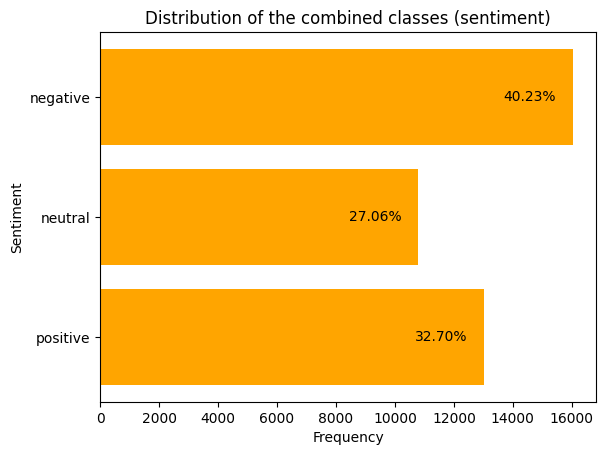

In [ ]:
sentiment_counts = df['label'].value_counts().sort_index()

# Extract sentiment values & frequencies
sentiments = sentiment_counts.index
frequencies = sentiment_counts.values

total = sum(frequencies)  # Calculate the total frequency

plt.barh(sentiments, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Sentiment')
plt.title('Distribution of the combined classes (sentiment)')
plt.gca().invert_yaxis()

# Annotate each bar with its percentage
for index, value in enumerate(frequencies):
    percentage = (value / total) * 100
    plt.text(value - (max(frequencies) * 0.09), index, f'{percentage:.2f}%', ha='center', va='center', color='black')

plt.show()

In [ ]:
# Mapping sentiment num / encode
df["label_num"] = df.label.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2
})

df = df.drop(columns=['label'])
df.head(5)

,content,label_num
0,@tiffanylue i know i was listenin to bad habi...,0
1,Layin n bed with a headache ughhhh...waitin o...,0
2,Funeral ceremony...gloomy friday...,0
3,wants to hang out with friends SOON!,1
4,@dannycastillo We want to trade with someone w...,2


In [ ]:
X = df['content']
y = df['label_num']

# Making sure that X y have the same length
print(len(X))
print(len(y))

39827
39827


# Preprocessing: Data Cleaning
<a id='data-cleaning'></a>

In [ ]:
# Cleaning and lemmatising
cleaned = []

for sen in range(0, len(X)):
    # Remove all the special characters (any letter or a digit)
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters (surrounded by whitespace)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization- splits into list of words ['The', 'quick', ....]
    document = document.split()

    lemma = WordNetLemmatizer()
    document = [lemma.lemmatize(word) for word in document]
    document = ' '.join(document)
    cleaned.append(document)

In [ ]:
# Making sure that cleaned data has the same length as X
len(cleaned)

39827

# Preprocessing: Exploring Cleaned Data & Investigating Stopwords in Text
<a id='preprocessing'></a>

In [ ]:
# Count stopwords present in the data
nltk.download('punkt')
def count_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(text)
    return len(set(words) & stop_words)

# Add a new col 'stop_words' that contains the count of stopwords
df['stop_words'] = df['content'].apply(count_stopwords)
value_counts = df['stop_words'].value_counts()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Count the number of stopwords in the data
temp = df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['content'].apply(lambda x: len(set(x.split()) & stop_words))

# Print rows that contain stopwords
rows_with_stopwords = temp[temp['stop_words'] > 0]
print(rows_with_stopwords)

                                                 content  label_num  \
0      @tiffanylue i know  i was listenin to bad habi...          0   
1      Layin n bed with a headache  ughhhh...waitin o...          0   
3                   wants to hang out with friends SOON!          1   
4      @dannycastillo We want to trade with someone w...          2   
5      Re-pinging @ghostridah14: why didn't you go to...          0   
...                                                  ...        ...   
39819  @jasimmo Ooo showing of your French skills!! l...          2   
39820  @sendsome2me haha, yeah. Twitter has many uses...          2   
39823                     Happy Mothers Day  All my love          1   
39824  Happy Mother's Day to all the mommies out ther...          1   
39826  @mopedronin bullet train from tokyo    the gf ...          1   

       stop_words  
0               6  
1               4  
3               3  
4               6  
5               5  
...           ...  
39819  

In [ ]:
# Explore tweet that contains stopwords
df['content'][3]
# df.loc[3]

'wants to hang out with friends SOON!'

In [ ]:
# Count stopwords in index 3
stop_words = set(stopwords.words("english"))
df_indx = df['content'][3]
stopword_count = len([word for word in df_indx.split() if word in stop_words])
stopword_count

3

In [ ]:
# Print all the stopwords in index 3
stopwords_in_content = [word for word in df_indx.split() if word in stop_words]

print("Stopwords in df['content'][3]:")
print(stopwords_in_content)

'''
The cleaned sentence from 4th row, ['wants to hang out with friends SOON!']
contains 3 stopwords, 'to', 'out', and 'with'
'''

Stopwords in df['content'][3]:
['to', 'out', 'with']


"\nThe cleaned sentence from 4th row, ['wants to hang out with friends SOON!']\ncontains 3 stopwords, 'to', 'out', and 'with'\n"

# Preprocessing: Tokenisation
<a id='tokenisation'></a>

In [ ]:
cleaned_tokenized = []
for each in cleaned:
    doc = sent_tokenize(each)
    for sentence in doc:
        cleaned_tokenized.append(sentence)

# Type and length of the cleaned & tokenised sentence
print(type(cleaned_tokenized))
print(len(cleaned_tokenized))

# Print the fist 15 lines of the cleaned & tokenised sentence
for i in range(15):
  print(cleaned_tokenized[i])

<class 'list'>
39827
tiffanylue know wa listenin to bad habit earlier and started freakin at his part
layin bed with headache ughhhh waitin on your call
funeral ceremony gloomy friday
want to hang out with friend soon
dannycastillo we want to trade with someone who ha houston ticket but no one will
re pinging ghostridah14 why didn you go to prom bc my bf didn like my friend
i should be sleep but im not thinking about an old friend who want but he married now damn amp he want me 2 scandalous
hmmm http www djhero com is down
charviray charlene my love miss you
kelcouch m sorry at least it friday
cant fall asleep
choked on her retainer
ugh have to beat this stupid song to get to the next rude
brodyjenner if watch the hill in london will realise what tourture it is because were week and week late just watch itonlinelol
got the news


In [ ]:
# Crate a new colum that contains processed text
df['processed_content'] = cleaned_tokenized

# Reorder col
desired_order = ['content', 'processed_content', 'label_num']
df = df[desired_order]
df.head(10)

X = cleaned_tokenized

In [ ]:
# Pick a random row, count SW in that sentence
df.loc[3]

content              wants to hang out with friends SOON!
processed_content       want to hang out with friend soon
label_num                                               1
Name: 3, dtype: object

# Feature Engineering: Vectorising Using TF-IDF
<a id='tfidf'></a>

In [ ]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix = count_vectorizer.transform(X)      # CV sparse matrix

tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix) # tf-idf sparse matrix
# print(tf_idf_matrix)
dense_tf_idf_matrix = tf_idf_matrix.toarray()         # tf-idf dense matrix
# print(dense_tf_idf_matrix)

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, y, test_size=0.2, random_state=42)

# Model Training/Testing/Evaluation: MNB
<a id='mnb'></a>

Classification Report (Cross-Validation):
               precision    recall  f1-score   support

           0       0.49      0.92      0.64     12834
           1       0.63      0.45      0.53     10395
           2       0.53      0.02      0.05      8632

    accuracy                           0.53     31861
   macro avg       0.55      0.47      0.41     31861
weighted avg       0.55      0.53      0.44     31861

Accuracy (Cross-Validation): 0.5254386240231004
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       0.49      0.91      0.64      3190
           1       0.65      0.49      0.56      2629
           2       0.50      0.03      0.05      2147

    accuracy                           0.53      7966
   macro avg       0.55      0.48      0.42      7966
weighted avg       0.55      0.53      0.46      7966

Accuracy (Test Data): 0.5333919156414763


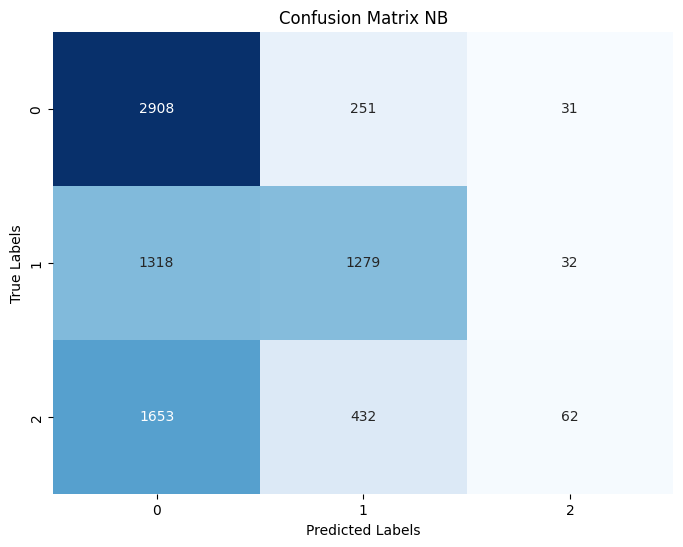

In [ ]:
model = MultinomialNB()

# Train
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_pred_cv = cross_val_predict(model, X_train, y_train, cv=cv)

classification_rep = classification_report(y_train, y_pred_cv)
print("Classification Report (Cross-Validation):\n", classification_rep)

accuracy = accuracy_score(y_train, y_pred_cv)
print("Accuracy (Cross-Validation):", accuracy)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

classification_rep_test = classification_report(y_test, y_pred_test)
print("Classification Report (Test Data):\n", classification_rep_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy (Test Data):", accuracy_test)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix NB')
plt.show()

# Model Training/Testing/Evaluation: MLP
<a id='mlp'></a>

Accuracy: 0.5233
Precision: 0.5242
Recall: 0.5233
F1-score: 0.5235


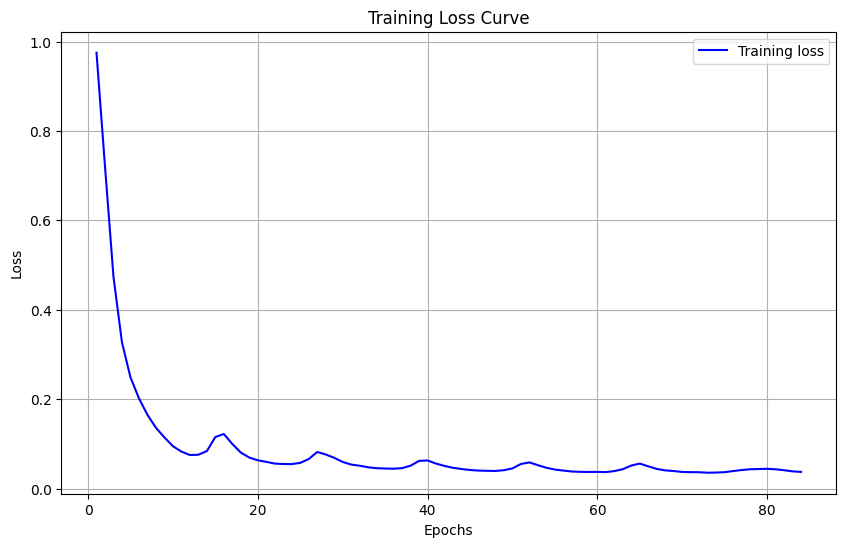

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), alpha = 0.01, max_iter=100)

# Train
history = mlp_model.fit(X_train, y_train)

# Test
y_pred = mlp_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

train_loss = history.loss_curve_
num_epochs = len(train_loss)

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Model Training/Testing/Evaluation: SVM
<a id='svm'></a>

In [ ]:
# Train
model = SVC()
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)

# Evaluate
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.75      0.67      3190
           1       0.65      0.59      0.62      2629
           2       0.48      0.35      0.41      2147

    accuracy                           0.59      7966
   macro avg       0.58      0.56      0.56      7966
weighted avg       0.58      0.59      0.58      7966

Accuracy: 0.5906351995982927


<br>

# Experiment details <a id='details'></a>


Experimenting with models using processed dataset VS unprocessed dataset: [link to unprocessed](https://colab.research.google.com/drive/1jh9gScBxIQdxO-8pPBg46C7_soCVFkHQ?usp=sharing) / [link to preprocessed](https://colab.research.google.com/drive/1QbfXdSHwerGPzA1gFMOPjBuNbXyNOMn-?usp=sharing)

Among the tabulated results below, the SVM classifier with raw data achieved the highest precision
rate of 0.58, along with the highest overall score, including recall (0.59) and F1 (0.58) score. The lowest
precision of 0.506, was observed with the MLP classifier on processed data. The NB classifier on
preprocessed data had the lowest recall, at 0.48.

![processed vs unprocessed](https://github.com/PixieParksie/-Uni-Project-Data-Mining-/assets/106667881/32212ac0-5af3-4bb3-b04c-1c623cffcedd)


These models achieved precision and recall rate approximately 50%, meaning that predictions for
sentiments are somewhat accurate but not highly precise in terms of minimising false positives and false
negatives.

<br>

To find variation between the algorithms, I assessed the sensitivity of each model to changes in data
characteristics by comparing the differences in precision, recall, and F1-score between processed and
unprocessed data. As shown in the table below, there is consistency between the SVM scores for unprocessed and
processed data. From this, it can be assumed that SVM is relatively robust to changes in the input data
because, due to its nature, it finds a hyperplane that best separates classes based on the original features.
MLP on the other hand, is a little more sensitive to quality of input data due to its capacity to capture
complex, non-linear relationships in data. MLP may struggle to learn these patterns and perform better
with preprocessed, cleaner data.

![2](https://github.com/PixieParksie/-Uni-Project-Data-Mining-/assets/106667881/344262f3-1694-47b8-b68a-ef4eedb13563)


The consistent pattern showed only slight changes in classification results. Variation of preprocessing did not contribute much significant changes. Another consistent pattern I observed was that, after embedding text with GloVe, classifier accuracy rates dropped by up to 20% for both unprocessed and preprocessed data.

<br>

Expected / Unexpected outcomes and result aberrations in the experiments :
- I was concerned that removing stopwords might lead to the loss of valuable information,
particularly in rows with a high number of stopwords, containing over 50% of the sentence. As
expected, retaining stopwords improved precision.
- Stemming and lemmatisation had minimal impact on accuracy.
Stemming had no effect, while lemmatisation produced sight changes by approximately 0.001.
- I expected that using word embeddings like GloVe would enhance accuracy by capturing
semantic and contextual information. Contrary to this, embedding usage led to a significant
accuracy decrease of up to 20%, which starkly contrasts with our previous findings.
- All classification results (accuracy, precision, recall, and F1-score) dropped when using
preprocessed data, except for the accuracy of Naive Bayes, which showed a slight increase.

<br>

Although Naive Bayes achieved the highest accuracy score, accuracy alone isn't always the reliable
metric. The best-performing algorithm was SVM, which demonstrated the highest precision and recall
rates. It also exhibited robustness to noise and changes in input data, making it the ideal choice for the
Emotion Detection dataset. Moreover, it does not require too significant computational resources, making
it an approachable option. Based on the experiment results, the most effective preprocessing techniques
were lemmatisation and the retention of stopwords, and the best feature selection method was TF-IDF, as
it consistently provided the best outcomes in the iterative experiments.


<br>

# Conclusion <a id='conclusion'></a>

In conclusion, these experiments and analysis have shed light on the influence of various factors, including
algorithm types, parameters, pre-processing, and feature engineering techniques, on classification results.

Based on the findings, I recommend using SVM combined with lemmatisation, retaining stopwords, and utilising a TF-IDF vectoriser.

In theory, unprocessed data is expected to outperform preprocessed data due to the risk of overfitting in
unprocessed data, where the model may capture noise, leading to poor generalisation. Preprocessing is
designed to mitigate overfitting by cleaning and simplifying the data, allowing the model to focus on the
most relevant information.

However, our empirical results challenge this theoretical expectation. Surprisingly, I observed no
significant differences in evaluation metrics between unprocessed and preprocessed data. This suggests
that preprocessing may have limited impact in this context, or the data's quality may mitigate the effects
of cleaning steps.